In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#from sklearn.metrics import classification_repo
#rt, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('google_reviews5.csv')
df.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_img_urls,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id
0,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE,...,https://lh5.googleusercontent.com/p/AF1QipMWTU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.683401e+09,05/06/2023 19:20,0.0,-6.370000e+18
1,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB,...,https://lh5.googleusercontent.com/p/AF1QipMcUy...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687931e+09,06/28/2023 05:41:44,1.0,-6.370000e+18
2,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE,...,https://lh5.googleusercontent.com/p/AF1QipMrQg...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.679049e+09,03/17/2023 10:27:11,1.0,-6.370000e+18
3,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB,...,https://lh5.googleusercontent.com/p/AF1QipOCqJ...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.687723e+09,06/25/2023 19:54:18,0.0,-6.370000e+18
4,"restaurant, dublin",FIRE Steakhouse & Bar,0x48670e9baf2ed897:0xa78bc9f5604e6175,ChIJl9gur5sOZ0gRdWFOYPXJi6c,https://www.google.com/maps/place/FIRE+Steakho...,https://search.google.com/local/reviews?placei...,"{""1"": 95, ""2"": 101, ""3"": 250, ""4"": 656, ""5"": 1...",2951,4.4,ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB,...,https://lh5.googleusercontent.com/p/AF1QipP7KU...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.686415e+09,06/10/2023 16:43,0.0,-6.370000e+18


In [3]:
# List of column names to drop
columns_to_drop = ['query','google_id', 'location_link', 'reviews_link','reviews_per_score', 'review_id',
                  'review_img_urls','author_image', 'owner_answer_timestamp','owner_answer_timestamp_datetime_utc',
                   'review_datetime_utc','author_title','review_img_url','author_link','review_timestamp']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,reviews_id
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.110000e+20,Excellent dinner experience in the city center...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.150000e+20,Outstanding from start to finish!\n\nEnjoyed a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18
3,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,Called in on a Saturday without a booking with...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18
4,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,"We went today for lunch, food was amazing! The...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18


In [31]:
#EDA-Exploratory data analysis
print (df['rating'].unique())

[4.4 4.1 4.2 3.9 4.5 4.6 4.3 4.7 4.8 3.  3.5 3.8 3.2 3.1 2.9 2.8 3.3 3.4
 3.6 3.7 4.9]


In [5]:
#EDA
df.isnull().sum()

name                0
place_id            0
reviews             0
rating              0
author_id           0
review_text         0
owner_answer     1146
review_link         1
review_rating       1
review_likes        1
reviews_id          1
dtype: int64

In [33]:
df['review_text']. dropna() #need to deal with missing data-delete rows?, justify. empty reviews dropped, not useful to dataset

0       This place is absolutely outstanding. It was a...
1       Excellent dinner experience in the city center...
2       Outstanding from start to finish!\n\nEnjoyed a...
3       Called in on a Saturday without a booking with...
4       We went today for lunch, food was amazing! The...
                              ...                        
1323    Probably the best vegan burger I've ever had. ...
1324    Cozy little restaurant with really tasty food....
1325    Very cosy, intimate restaurant. Lovely staff, ...
1326    So many mussels, and for cheap too! They were ...
1327    Portions are huge and their prices are so good...
Name: review_text, Length: 1328, dtype: object

In [34]:
df=df.dropna(subset=['review_text'])

In [35]:
df.isnull().sum()

name                0
place_id            0
reviews             0
rating              0
author_id           0
review_text         0
owner_answer     1146
review_link         1
review_rating       1
review_likes        1
reviews_id          1
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1328 non-null   object 
 1   place_id       1328 non-null   object 
 2   reviews        1328 non-null   int64  
 3   rating         1328 non-null   float64
 4   author_id      1328 non-null   float64
 5   review_text    1328 non-null   object 
 6   owner_answer   182 non-null    object 
 7   review_link    1327 non-null   object 
 8   review_rating  1327 non-null   float64
 9   review_likes   1327 non-null   float64
 10  reviews_id     1327 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 114.2+ KB


In [37]:
df.describe()

,reviews,rating,author_id,review_rating,review_likes,reviews_id
count,1328.000000,1328.000000,1.328000e+03,1327.000000,1327.000000,1.327000e+03
mean,2264.518072,4.297063,1.092954e+20,4.240392,0.666918,-2.748993e+17
std,2307.248006,0.417116,5.448076e+18,1.143648,1.392930,5.586682e+18
min,239.000000,2.800000,1.000000e+20,1.000000,0.000000,-9.130000e+18
25%,1234.000000,4.100000,1.043395e+20,4.000000,0.000000,-6.580000e+18
50%,1702.000000,4.400000,1.093930e+20,5.000000,0.000000,7.090000e+17
75%,2951.000000,4.600000,1.140000e+20,5.000000,1.000000,5.000000e+18
max,12985.000000,4.900000,1.183530e+20,5.000000,17.000000,8.980000e+18


In [38]:
df.shape

(1328, 11)

In [39]:
df.describe().T.drop("count",axis=1) #Summary Statistics

,mean,std,min,25%,50%,75%,max
reviews,2.264518e+03,2.307248e+03,2.390000e+02,1.234000e+03,1.702000e+03,2.951000e+03,1.298500e+04
rating,4.297063e+00,4.171155e-01,2.800000e+00,4.100000e+00,4.400000e+00,4.600000e+00,4.900000e+00
author_id,1.092954e+20,5.448076e+18,1.000000e+20,1.043395e+20,1.093930e+20,1.140000e+20,1.183530e+20
review_rating,4.240392e+00,1.143648e+00,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
review_likes,6.669179e-01,1.392930e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01
reviews_id,-2.748993e+17,5.586682e+18,-9.130000e+18,-6.580000e+18,7.090000e+17,5.000000e+18,8.980000e+18


In [40]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['vadar compound']].sort_values(by='vadar compound', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with vadar compound', fontdict={'fontsize':18}, pad=16);

KeyError: "None of [Index(['vadar compound'], dtype='object')] are in the [columns]"

<Figure size 800x1200 with 0 Axes>

In [ ]:
df['review_likes'].value_counts()

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['review_likes']].sort_values(by='review_likes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Features Correlating with review_likes', fontdict={'fontsize':18}, pad=16);

In [ ]:
df['rating'].value_counts()

Text(0, 0.5, 'Density')

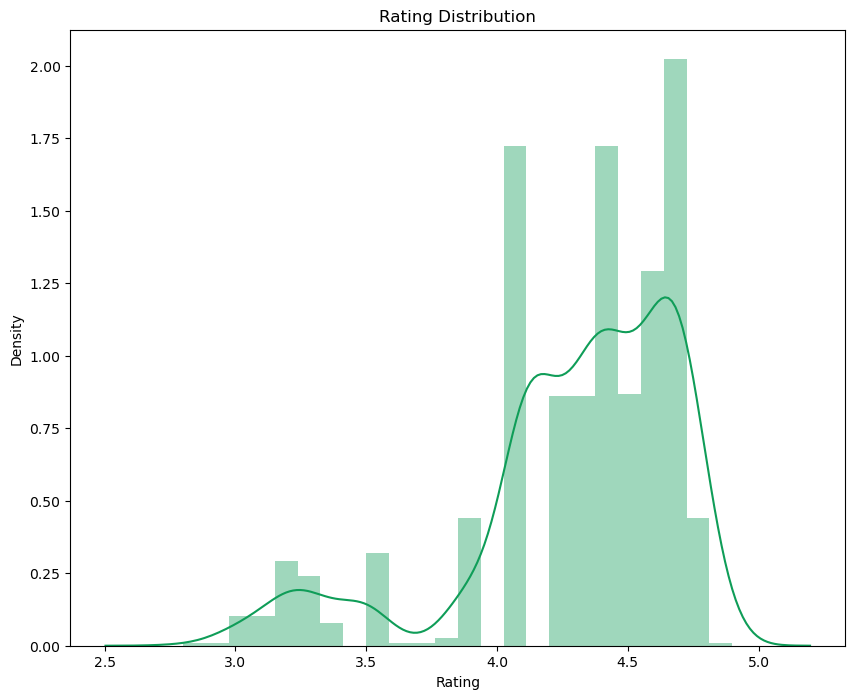

In [61]:
fig = plt.figure(figsize=(10, 8))# rating distribution with google green colour
sns.distplot(df["rating"], color = '#0F9D58')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')

In [ ]:
df.review_text.astype(str)

In [ ]:
#pip install WordCloud

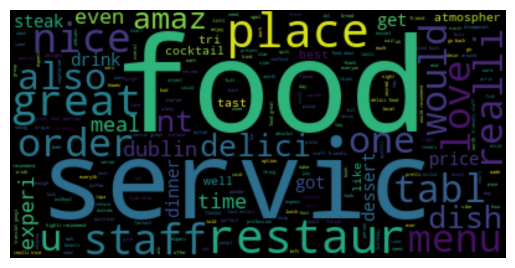

In [62]:
#Creating Stopwords list
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))
stopwords.update(["br","href", "good",'Translated' 'by' 'Google','of','the','is'])
textt = " ".join(review for review in df.review_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)


plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()

In [ ]:
df['review_text'] = df['review_text'].str.lower()# using str.lower to modify to lowercase
df['review_text'].head()

In [ ]:
nltk.download('stopwords')

In [6]:
#counting nr. of stopwords per review
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['nr_stopwords'] = df['review_text'].apply(lambda x: len(set(x.split()) & stop_words))

In [ ]:
df['nr_stopwords'].describe()#assessing nr. of stopwords in dataset

In [7]:
import string 
# Storing the sets of punctuation in variable result 
result = string.punctuation 
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
from collections import Counter
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

df['count_punct'] = df.review_text.apply(lambda s: count(s, string.punctuation))
accumulate = lambda l1,l2: [x for x in l1 if x in l2]

df['acc_punct_list'] = df.review_text.apply(lambda s: accumulate(s, string.punctuation))
# accumulate the punctuation marks of each line in a dict and transpose each element into dataframe columns
df['acc_punct_dict'] = df.review_text.apply(lambda s: {k: v for k, v in Counter(s).items() if k in string.punctuation} if any(char in string.punctuation for char in s) else {})

In [9]:
df_punct = df.acc_punct_dict.apply(pd.Series)

In [10]:
df_punct

,.,",",',(,),!,:,-,+,;,...,%,*,#,?,~,@,\,$,<,>
0,6.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,NaN,NaN,1.0,1.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,3.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,6.0,8.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,2.0,3.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

In [11]:
df['tokenized_review'] = df.apply(lambda row: nltk.word_tokenize(row['review_text']), axis=1)
df['review_length'] = df.apply(lambda row: len(row['tokenized_review']), axis=1)
df.head()


,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,reviews_id,nr_stopwords,count_punct,acc_punct_list,acc_punct_dict,tokenized_review,review_length
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,26,13,"[., ., ,, ., ,, ., ,, ., ,, ', (, ), .]","{'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}","[This, place, is, absolutely, outstanding, ., ...",116
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.110000e+20,Excellent dinner experience in the city center...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18,12,4,"[., ., ., .]",{'.': 4},"[Excellent, dinner, experience, in, the, city,...",52
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.150000e+20,Outstanding from start to finish!\n\nEnjoyed a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,-6.370000e+18,24,14,"[!, ., ., ., ., (, ), !, !, !, ., ., !, !]","{'!': 6, '.': 6, '(': 1, ')': 1}","[Outstanding, from, start, to, finish, !, Enjo...",134
3,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,Called in on a Saturday without a booking with...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,18,5,"[., ., ., ., .]",{'.': 5},"[Called, in, on, a, Saturday, without, a, book...",79
4,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,"We went today for lunch, food was amazing! The...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,-6.370000e+18,12,8,"[,, !, ., (, ), ,, ,, ,]","{',': 4, '!': 1, '.': 1, '(': 1, ')': 1}","[We, went, today, for, lunch, ,, food, was, am...",61


In [ ]:
!python -m spacy download en_core_web_sm -q

In [ ]:
df['tokenized_review'].head()

In [12]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
df['tokenized_review'].head()

In [13]:
df['tokenized_review'].astype(str)
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

TypeError: expected string or bytes-like object

In [14]:
import spacy
from spacy import displacy
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#count nr. of adjectives and nouns in review 

In [ ]:
df['review_text'].astype(str)
doc = df['review_text'].apply(nlp)#applying spacy and background pipeline will return the objects.

In [15]:
# Function to process each text and extract named entities
def get_named_entities(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply the function to 'review_text' column and store the results in a new column 'named_entities'
df['named_entities'] = df['review_text'].apply(get_named_entities)
#reate a function get_named_entities that processes each text using spaCy and returns a
#list of named entities and their labels. Then, we use the apply method to apply this function 
#to each element in the 'review_text' column and store the results in a new column called 'named_entities'.
#Now, you can access the named entities for each text in the DataFrame.



In [ ]:
print(df['named_entities'].head())

In [63]:
displacy.render(nlp(str(df['named_entities'])), jupyter=True, style='ent')
#generate the raw markup.

In [ ]:
displacy.render(nlp(str(df['named_entities'])), style='dep', jupyter = True, options = {'distance': 120})
#Using spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like

In [ ]:
# extract part-of-speech and lemmatize
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(df['named_entities'])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

In [ ]:
dict([(str(x), x.label_) for x in nlp(str(df['named_entities'])).ents])
#using a list comprehension to extract token information (orthographic 
#representation, part-of-speech tag, and lemma) from a spaCy Doc object
#output is a list of tuples, each containing the orthographic representation,
#part-of-speech tag, and lemma of the tokens

In [ ]:
for entities in df['named_entities']:
    print(entities)

In [ ]:
displacy.render(doc, jupyter=True, style='ent')
#Running this code will display a visual representation
#of the named entities detected in the 'article'. Each entity will be highlighted with its respective entity label. 

In [16]:
#counting details per review, nouns, date, numbers,locations

def count_nouns(review_text):
    doc = nlp(review_text)
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
    return noun_count

# Apply the count_nouns function to the 'text_column' and save the counts to a new column
df['noun_count'] = df['review_text'].apply(count_nouns)

In [17]:
#counting details per review, nouns, date, numbers,locations

def count_percent(review_text):
    doc = nlp(review_text)
    percent_count = sum(1 for token in doc if token.pos_ == "PERCENT")
    return percent_count

# Apply the count_nouns function to the 'text_column' and save the counts to a new column
df['percent_count'] = df['review_text'].apply(count_percent)

In [18]:
def count_date(review_text):
    doc = nlp(review_text)
    date_count = sum(1 for token in doc if token.pos_ == "DATE")
    return date_count
df['date_count'] = df['review_text'].apply(count_date)

In [21]:
def count_ordinal(review_text):
    doc = nlp(review_text)
    ordinal_count = sum(1 for token in doc if token.pos_ == "ORDINAL")
    return ordinal_count
df['ordinal_count'] = df['review_text'].apply(count_ordinal)

In [22]:
def count_location(review_text):
    doc = nlp(review_text)
    location_count = sum(1 for token in doc if token.pos_ == "GPE")
    return location_count
df['location_count'] = df['review_text'].apply(count_location)

In [23]:
# Function to check if the sum of the four columns is less than 5, checking details of review
def check_sum(row):
    return 1 if row['noun_count'] + row['date_count'] + row['ordinal_count'] + row['location_count'] + row['percent_count']  < 10 else 0

# Apply the check_sum function to each row and create the 'new_column'
df['check 7'] = df.apply(check_sum, axis=1)

In [24]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,acc_punct_dict,tokenized_review,review_length,named_entities,noun_count,percent_count,date_count,ordinal_count,location_count,check 7
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,This place is absolutely outstanding. It was a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,"{'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}","[This, place, is, absolutely, outstanding, ., ...",116,[],26,0,0,0,0,0
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.110000e+20,Excellent dinner experience in the city center...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,...,{'.': 4},"[Excellent, dinner, experience, in, the, city,...",52,"[(Dublin, GPE), (three, CARDINAL)]",14,0,0,0,0,0
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.150000e+20,Outstanding from start to finish!\n\nEnjoyed a...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,1.0,...,"{'!': 6, '.': 6, '(': 1, ')': 1}","[Outstanding, from, start, to, finish, !, Enjo...",134,"[(Fire.\n\n, FAC), (3, CARDINAL), (Two, CARDIN...",29,0,0,0,0,0
3,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,Called in on a Saturday without a booking with...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,{'.': 5},"[Called, in, on, a, Saturday, without, a, book...",79,"[(Saturday, DATE)]",17,0,0,0,0,0
4,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.070000e+20,"We went today for lunch, food was amazing! The...",NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,"{',': 4, '!': 1, '.': 1, '(': 1, ')': 1}","[We, went, today, for, lunch, ,, food, was, am...",61,"[(today, DATE), (Alex, PERSON), (Greece, GPE)]",7,0,0,0,0,1


In [25]:
df['check 7'].value_counts()

0    696
1    632
Name: check 7, dtype: int64

In [27]:
#removing stopwords for purpose of countvectorizer
df['review_text'].astype(str)
df['review_text'] = df['review_text'].apply(remove_stopwords)

In [28]:
#removing punctuation for purpose of countvectorizer
df['review_text'] = df['review_text'].str.replace('[^\w\s]', '')

In [29]:
#Count how many times each term shows up in each review
def text_vectorizing_process(string):
    return [word for word in string.split()]

In [30]:
#2nd tokenizing-delete previous
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(
    analyzer=text_vectorizing_process,
    ngram_range=(1, 2),
    min_df=0.005,
    max_df=0.9
)
cvec.fit(df['review_text'])

CountVectorizer(analyzer=<function text_vectorizing_process at 0x00000146C5336710>,
                max_df=0.9, min_df=0.005, ngram_range=(1, 2))

In [31]:
# Get the total n-gram count
len(cvec.vocabulary_)

1012

In [32]:
# Creating the bag-of-words representation , Term counts for each review
cvec_counts = cvec.transform(df['review_text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (1328, 1012)
nonzero count: 29342
sparsity: 2.18%


In [33]:
# Instantiating the TfidfTransformer
#Calculate the weights for each term in each review
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<1328x1012 sparse matrix of type '<class 'numpy.float64'>'
	with 29342 stored elements in Compressed Sparse Row format>

In [34]:

# Convert the transformed weights to a dense numpy array
transformed_weights = transformed_weights.toarray()

# Get the vocabulary (list of n-grams)
vocab = cvec.get_feature_names_out()

# Create a DataFrame with the transformed weights
model = pd.DataFrame(transformed_weights, columns=vocab)

# Add columns for keyword, max weight, and sum of weights
model['Keyword'] = model.idxmax(axis=1)  # Identify the keyword with the highest weight
model['Max'] = model.max(axis=1)  # Maximum weight for each row (document)
model['Sum'] = model.drop(columns=['Max', 'Keyword']).sum(axis=1)  # Sum of weights (excluding max)

# Display the first 10 rows of the DataFrame
print(model.head(10))

     1   10  100  1010   12  125   13        15    2   20  ...  wrong  year  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
5  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
6  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   
7  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.151084  0.0  0.0  ...    0.0   0.0   
8  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.241364  0.0  0.0  ...    0.0   0.0   
9  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   0.0   

   years  yesterday       yet  young  yummy      Keyword       Max       Sum  
0    0.0        0.0  0.000000    0.0    0.0     bir

In [61]:
# Merging td-idf weight matrix with original DataFrame data2
#model = pd.merge(cleaned_text, model, left_index=True, right_index=True)
# Check the merged dataset
model.head(10)

,1,10,100,1010,12,125,13,15,2,20,...,wrong,year,years,yesterday,yet,young,yummy,Keyword,Max,Sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,birthday,0.276762,6.385394
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,choice,0.392837,4.473370
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,cauliflower,0.334889,6.652559
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,terrace,0.284047,4.687165
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,new,0.508571,4.132572
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.172451,0.0,0.0,members,0.344902,6.790974
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,special,0.276349,5.937794
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151084,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,husband,0.280106,7.051982
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241364,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,s,0.288342,4.988054
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,oysters,0.287606,7.522144


In [35]:
#top 100 frequently occured words in the review
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(10)

,Term,Occurrences
427,food,894
462,good,502
809,service,451
465,great,414
685,place,409
855,staff,363
757,restaurant,327
625,nice,285
314,delicious,255
744,recommend,237


In [36]:
#Top 10 weighted occured words in the review
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(10)

,Term,Weight
427,food,0.057040
462,good,0.042162
809,service,0.037255
465,great,0.036175
685,place,0.034577
855,staff,0.031180
625,nice,0.029394
757,restaurant,0.027661
314,delicious,0.026576
142,amazing,0.023214


In [64]:
df['review_text'] = df['review_text'].astype(str)
#df['review_text'] = df['review_text'].str.lower()

In [37]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['review_text'] = df['review_text'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["review_text"] = df["review_text"].apply(lambda text: lemmatize_words(text))

In [65]:
df['review_text'].head()

0    place absolutely outstanding  birthday dinner ...
1    Excellent dinner experience city center Dublin...
2    Outstanding start finish  Enjoyed wonderful ev...
3    Called Saturday without booking daughter  acco...
4    went today lunch  food amazing  place incredib...
Name: review_text, dtype: object

In [ ]:
#df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

<Axes: xlabel='count', ylabel='review_text'>

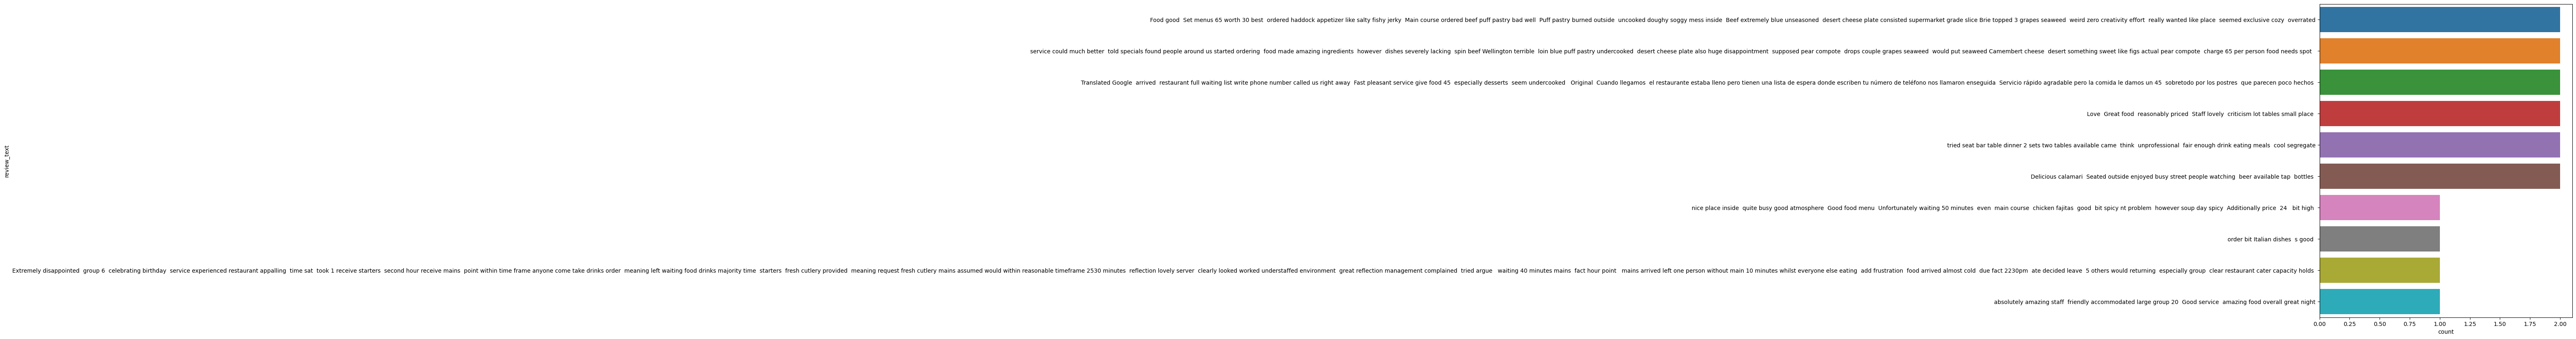

In [66]:
plt.figure(figsize=(8,10))
sns.countplot(y='review_text',data=df,order=df.review_text.value_counts().iloc[:10].index)

In [ ]:
#after removing punction, readding it in as indicator
df['review_text'].replace({'!': ' exclamation ','?': ' question_mark ',
                           '\'' : ' quotation ','\'': 'quotation'},inplace=True)
df['review_text']

In [67]:

#repeat for positive and negative ratings
consolidated=' '.join(word for word in df['review_text'][df['rating']<4].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, background_color = 'white')
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='gaussian')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
nltk.download('punkt')

In [ ]:
df['review_text'].astype(str)

In [38]:
from collections import Counter

def counter(text):
    cnt=Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

text_cnt=counter(df['review_text'])

<Axes: xlabel='Counts', ylabel='Words'>

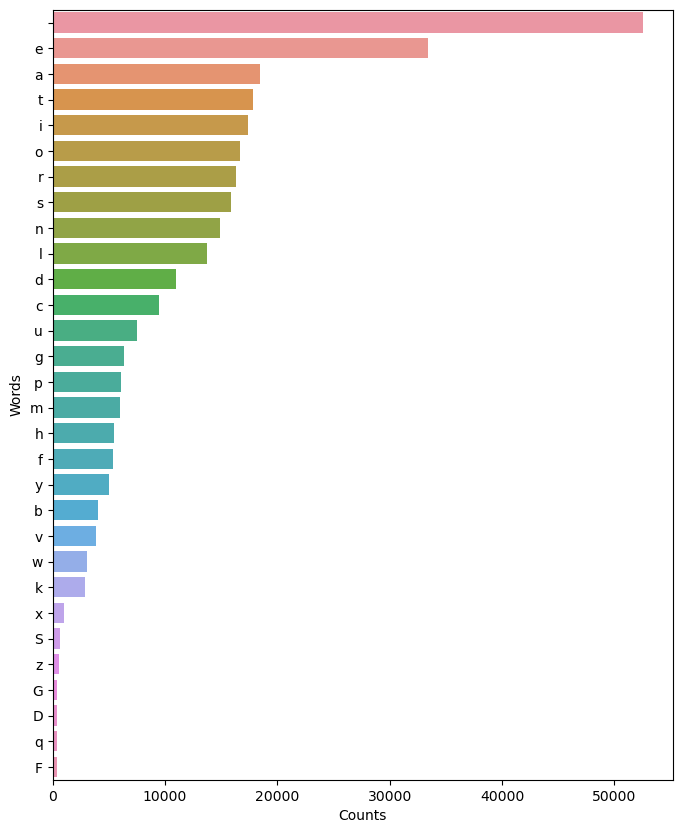

In [69]:
common_words= text_cnt.most_common(30)
common_words=pd.DataFrame(common_words, columns=['Words','Counts'])
plt.figure(figsize=(8,10))
sns.barplot(y='Words', x='Counts', data=common_words)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
#named entity recognition, system identifies which word is a person’s name, location, etc.
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
#importing chunk library from nltk
#text = reviewText[8]
#token = word_tokenize(text)

In [ ]:
pip install svgling

In [ ]:
#tags = nltk.pos_tag(token)
#chunking picking up individual pieces of info and grouping into bigger pieces ie grouping words/tokens into chunks
chunk = ne_chunk(tig)
chunk

In [ ]:
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tig)
print(result)


In [ ]:
#pip install pandarallel
import nltk
nltk.download('vader_lexicon')
df['review_text'].astype(str)


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review_text'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df['vadar sentiment'] = df['vadar compound'].apply(categorise_sentiment)


In [ ]:
df.head()

In [71]:
#generate summary statistics
df[['vadar compound']].describe()

,vadar compound
count,1328.000000
mean,0.783505
std,0.360649
min,-0.949300
25%,0.797300
50%,0.920000
75%,0.963800
max,0.999100


In [72]:
#generate summary statistics
df[['vadar sentiment']].value_counts()

vadar sentiment
positive           1242
negative             65
neutral              21
dtype: int64

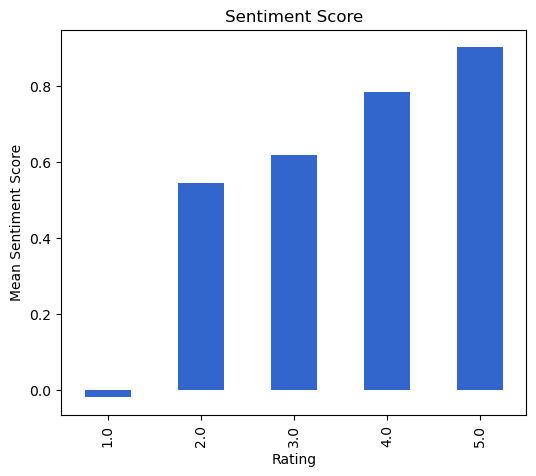

In [73]:
google_colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477",
                 "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc",
                 "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"]

# Set the color palette for Seaborn
sns.set_palette(google_colors)

# Generate mean of sentiment_score by period
dfg = df.groupby('review_rating')['vadar compound'].mean()

# Create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Rating', figsize=(6, 5))
plt.show()

In [ ]:
df['vadar sentiment'].value_counts()

In [74]:
positive_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positive_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

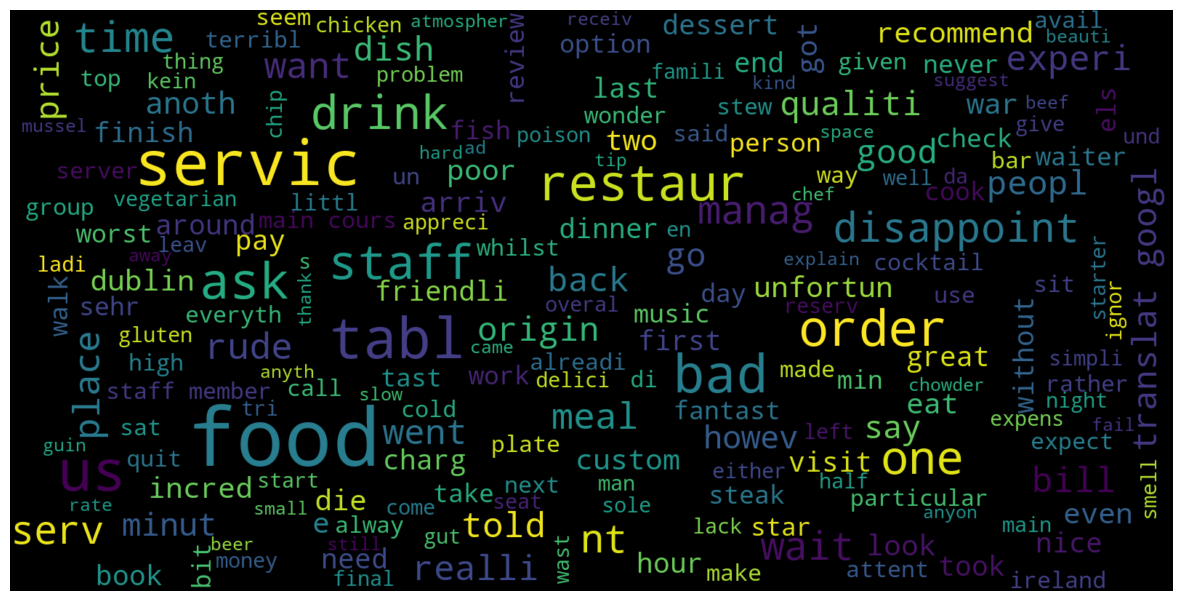

In [64]:
negative_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(negative_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['review_count']=df['author_title'].value_counts()#reviewers submitting >1 review
x=review_count.value_counts()
x

In [ ]:
df['author_id'].value_counts()

In [ ]:

df['name'].value_counts()

In [ ]:
df['name'].sum()

In [ ]:
places_per_author 

In [ ]:
df.head()

In [ ]:
df1.head()

In [41]:
# Calculate the count of reviews per author_id
reviews_per_author = df.groupby('author_id')['review_text'].count().reset_index()
reviews_per_author = reviews_per_author.rename(columns={'review_text': 'review_count'})

# Calculate the count of unique names of places reviewed per author_id
places_per_author = df.groupby('author_id')['name'].nunique().reset_index()
places_per_author = places_per_author.rename(columns={'name': 'count_of_places_reviewed'})

# Merge the two dataframes on 'author_id'
new_dataset = pd.merge(reviews_per_author, places_per_author, on='author_id')
#The for loop iterates over the rows of the new_dataset dataframe using the iterrows() method. Inside the loop, we
#compare the 'count of names of places reviewed' with the 'count of reviews' for each row. 
#If the condition row['count of names of places reviewed'] < row['count of reviews'], there maybe be multiple reviews for
#same place
 #Add 'check 1' column using if-else statements
new_dataset['check 1'] = 0
for index, row in new_dataset.iterrows():
    if row['count_of_places_reviewed'] < row['review_count']:
        new_dataset.at[index, 'check 1'] = 1

# Add 'check 2' column using if-else statements, check if this person submits>1 review
new_dataset['check 2'] = 0
for index, row in new_dataset.iterrows():
    if row['review_count'] > 1:
        new_dataset.at[index, 'check 2'] = 1

        
# Display the resulting dataset
print(new_dataset)

#check 1=1-author has submitted >1 review in dataset
#check2= 1-author has submitted multiple reviews for same place


        author_id  review_count  count_of_places_reviewed  check 1  check 2
0    1.000000e+20            25                        15        1        1
1    1.000530e+20             1                         1        0        0
2    1.001200e+20             1                         1        0        0
3    1.001540e+20             1                         1        0        0
4    1.002100e+20             1                         1        0        0
..            ...           ...                       ...      ...      ...
330  1.181870e+20             1                         1        0        0
331  1.182400e+20             2                         1        1        1
332  1.182760e+20             1                         1        0        0
333  1.182830e+20             1                         1        0        0
334  1.183530e+20             1                         1        0        0

[335 rows x 5 columns]


In [42]:
df = pd.merge(df, new_dataset[['author_id', 'check 1', 'check 2']], on='author_id', how='left')#adding check 1 & 2 back to dataset

In [ ]:
df.head()

In [ ]:
print(df.head())

In [43]:
# Step 1: Calculate the average of 'vadar_compound' per author
average_vadar_compound = df.groupby('author_id')['vadar compound'].mean().reset_index()
average_vadar_compound = average_vadar_compound.rename(columns={'vadar compound': 'avg_vadar_compound'})


In [ ]:
average_vadar_compound['avg_vadar_compound'].astype(float)

In [44]:
# Step 1: Calculate the average of 'vadar_compound' per author
#average_vadar_compound = df.groupby('author_id')['vadar compound'].mean().reset_index()
#average_vadar_compound = average_vadar_compound.rename(columns={'vadar compound': 'avg_vadar_compound'})
df = pd.merge(df, average_vadar_compound, on='author_id')
# Step 3: Add 'check 3' column using if-else statements to check if avg_vadar_compound is extreme
df['check 3'] = 0
for index, row in df.iterrows():
    if row['avg_vadar_compound'] <= -0.6 or row['avg_vadar_compound'] >= 0.95:
        df.at[index, 'check 3'] = 1
print(df)

                         name                     place_id  reviews  rating  \
0       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3                      NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
4                      NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
...                       ...                          ...      ...     ...   
1323  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1324  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1325  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1326  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1327  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   

         author_id                                 

In [45]:
#he count_punctuation() function takes a string as input and returns
#the count of punctuation marks using a loop over each punctuation character. Then, we
#use the apply() function to apply this function to each element in the 'text_column' and create a new column 'punctuation_count' containing the results.

def count_punctuation(text):
    return sum(text.count(p) for p in string.punctuation)


# Apply the function to the 'text_column' to count punctuation marks in each element
df['punctuation_count'] = df['review_text'].apply(count_punctuation)
df['punctuation_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: punctuation_count, dtype: int64

In [46]:
df['check 4'] = 0
for index, row in df.iterrows():
    if row['punctuation_count'] >10 :
        df.at[index, 'check 4'] = 1

In [ ]:
df.head()

In [47]:
#check 5 for owner answer
#the condition pd.isna(df['Column1']) | (df['Column1'] == '') checks if 'Column1' is either NaN or an empty string. 
#If it is NaN or an empty string, the corresponding value in 'New_Column' will be 1. Otherwise, it will be 0. 
#The np.where() function efficiently applies this condition and assigns the values to the 'New_Column' in the DataFrame.

#This way, both empty strings and NaN values are considered when creating the 'New_Column'
df['check 5'] = np.where(pd.isna(df['owner_answer']) | (df['owner_answer'] == ''), 1, 0)

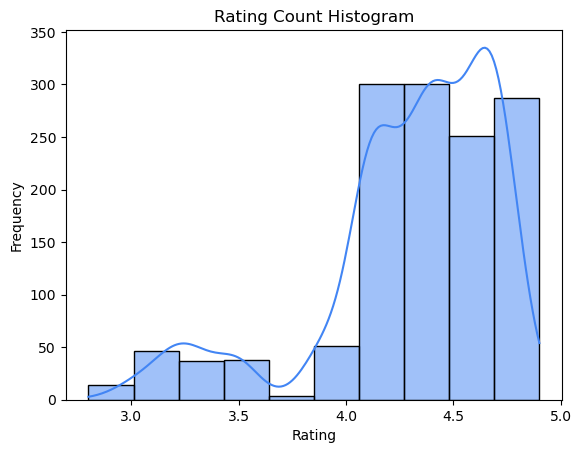

In [82]:

google_blue = "#4285F4"
sns.set_palette([google_blue])

# Create the histogram with Google's classic colors
sns.histplot(data=df, x='rating', kde=True, bins=10)
plt.title('Rating Count Histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [49]:
#check 6, checking review length
# Count the number of characters in 'Column1' and save to 'Character_Count'
df['char_count'] = df['review_text'].str.len()

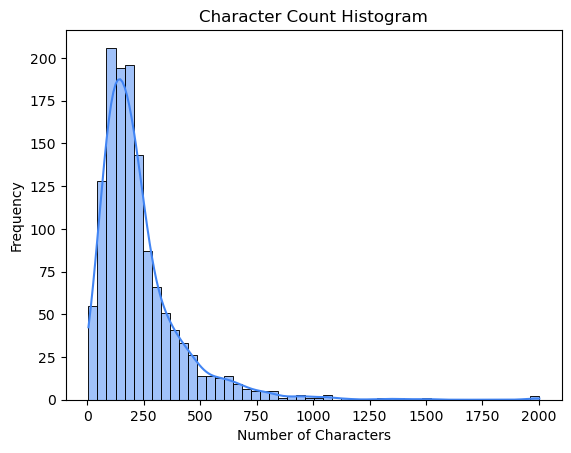

In [84]:
google_colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477",
                 "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc",
                 "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"]

# Set the color palette for Seaborn
google_blue = "#4285F4"
sns.set_palette([google_blue])

# Create the histogram with Google's classic colors
sns.histplot(data=df, x='char_count', kde=True, bins=50)
plt.title('Character Count Histogram')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

In [50]:
#review's length is additionally a significant pointer to
#distinguish spam reviews. At the point when the feedback substance is excessively short, we
#figure the commentator did not consider the item's experience truly

df['char_count'] = df['char_count'].astype(int)

df['check 6'] = 0
for index, row in df.iterrows():
    if row['char_count'] <150 :
        df.at[index, 'check 6'] = 1

In [ ]:
df['check 6'].value_counts()

In [51]:
# Function to check if the sum of the four columns is less than 5, checking details of review
def sum_check(row):
    return 'fake' if row['check 1'] + row['check 2'] + row['check 3'] + row['check 4'] + row['check 5'] + row['check 6'] + row['check 7'] > 3 else 'true'

# Apply the sum_check function to each row and create the 'fake' column
df['label'] = df.apply(sum_check, axis=1)

In [103]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,check 1,check 2,avg_vadar_compound,check 3,punctuation_count,check 4,check 5,char_count,check 6,label
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,place absolutely outstanding birthday dinner ...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.812495,0,0,0,1,374,0,true
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,dining environment friends Christmas still fes...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,1,1,0.812495,0,0,0,1,273,0,true
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,Went wife s birthday food good enough worth ...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,...,1,1,0.812495,0,0,0,1,123,1,fake
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,Great buzz night went Reasonable prices club ...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,1,1,0.812495,0,0,0,1,177,0,true
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,great time good dinner Perfect music,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.812495,0,0,0,1,39,1,fake


In [52]:
df['label'].value_counts()#29 values identified as meeting at least 3 of the 7 criteria (approximatly half)

true    867
fake    461
Name: label, dtype: int64

In [53]:
df.to_csv('export.csv')

In [ ]:
df = pd.read_csv('export.csv')

In [ ]:
pip install lazy-text-predict

In [ ]:
pip install classification

In [114]:
from tabulate import tabulate
from lazytextpredict import basic_classification



In [54]:
dataset3=df[['name','rating','author_id','label','review_text']]#subsetting dataset for ML learnin

In [55]:

# Set the seed for reproducibility
np.random.seed(42)

# Get 200 random row indices
random_indices = np.random.choice(dataset3.index, size=100, replace=False)
# Subset the DataFrame using the random indices
subset_df = df.loc[random_indices]
print(subset_df.head())



                                   name                     place_id  reviews  \
1201            The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365   
115                              Mr Fox  ChIJI9ohIoEOZ0gReHRyl3GepHw      845   
979   FX Buckley Steakhouse Crow Street  ChIJcWbtNYMOZ0gRIznsNiJdnFs     1888   
175                              Mr Fox  ChIJI9ohIoEOZ0gReHRyl3GepHw      845   
63                FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951   

      rating     author_id                                        review_text  \
1201     3.5  1.179250e+20  ate stop cliff moher fish chip bread rather ba...   
115      4.7  1.110000e+20  love experi ador almost speakeasi set professi...   
979      4.7  1.100000e+20  amaz meal fiancé birthday staff incred friendl...   
175      4.7  1.150000e+20  word describ impecc experi went extraordinari ...   
63       4.4  1.110000e+20  excel dinner experi citi center dublin book ad...   

     owner_answer         

In [105]:
subset_df.shape

(100, 29)

In [ ]:
g

In [ ]:
dataset3.head()

In [56]:
subset_df['target'] = np.where(subset_df['label']=='fake', 1, 0)
#reate a new column called target to hold our target variable, and we’ll assign 
#the CG fake reviews with 1, and the real or OR reviews with 0.

In [108]:
X = subset_df['review_text']
y = subset_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
#split into the training and test datasets we can use in our machine learning models. We’ll only be using one
#column of data here - the all_text data we preprocessed above. We’re defining the target column to y, so we’ll be training
#our model to predict that class value. We’ll split the data up in the usual manner using train_test_split().

In [123]:
Y

1201    0
115     0
979     1
175     1
63      0
       ..
244     0
23      0
938     0
43      0
243     1
Name: target, Length: 100, dtype: int32

In [58]:
X = subset_df.review_text
Y = subset_df.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

In [ ]:
dataset3

In [111]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [124]:
trial=basic_classification.LTP(Xdata=X,Ydata=Y, models='all')
trial.run()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


converting pandas series to list
converting pandas series to list
X_train length: 90
X_test length: 10
Y_train length: 90
Y_test length: 10
Training on a dataset with 2 labels


loading configuration file config.json from cache at C:\Users\quain/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at C:\Users\quain/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\pytorch_model.bin
Some weights 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

OSError: [WinError 433] A device which does not exist was specified: './results'

In [66]:
trial=basic_classification.LTP(Xdata=X,Ydata=Y, csv=None, xlsx=None, x_col='X', y_col='Y', models='all')
trial.run(training_epochs=3)


## Xdata is a list of text entries, and Ydata is a list of corresponding labels.
# csv and xlsx give options to load data from those file formats (you can pass the file or the file's location)
# x_col and y_col are strings that specify the columns of the # text and label columns in your csv or xlsx file respectively.
# You can choose between 'transformers'-based, 'count-vectorizer'-based, and 'all' models.

#Fewer training epochs will give poorer performance, but will run quicker to allow debugging.

NameError: name 'basic_classification' is not defined

In [121]:
trial.print_metrics_table()
#return the performance of the models that have been trained:https://github.com/lemay-ai/lazyTextPredict
#semi automatic, after fine tuning, find best model for dataset

                    Model            loss        accuracy              f1       precision          recall


In [119]:
focused_trial=basic_classification.LTP(test_frac=0.05,train_frac=0.45)
focused_trial.run(focused=True,focused_model='bert-base-uncased',training_epochs=3)

Either you have not put in your own data, or you have only put in X or Y data, loading default dataset...


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


X_train length: 22500
X_test length: 2500
Y_train length: 22500
Y_test length: 2500
Training on a dataset with 2 labels


loading configuration file config.json from cache at C:\Users\quain/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at C:\Users\quain/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\pytorch_model.bin
Some weights 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

OSError: [WinError 433] A device which does not exist was specified: './results'

In [69]:
df.head()

,name,place_id,reviews,rating,author_id,review_text,owner_answer,review_link,review_rating,review_likes,...,check 1,check 2,avg_vadar_compound,check 3,punctuation_count,check 4,check 5,char_count,check 6,label
0,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,place absolut outstand birthday dinner boyfrie...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.721633,0,0,0,1,325,0,true
1,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,dine environ friend christma still festiv atmo...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,1,1,0.721633,0,0,0,1,235,0,true
2,FIRE Steakhouse & Bar,ChIJl9gur5sOZ0gRdWFOYPXJi6c,2951,4.4,1.010000e+20,went wife s birthday food good enough worth po...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,2.0,2.0,...,1,1,0.721633,0,0,0,1,115,1,fake
3,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,great buzz night went reason price club dublin...,NaN,https://www.google.com/maps/reviews/data=!4m8!...,4.0,0.0,...,1,1,0.721633,0,0,0,1,155,0,true
4,NoLIta,ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg,2277,4.1,1.010000e+20,great time good dinner perfect music,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5.0,0.0,...,1,1,0.721633,0,0,0,1,36,1,fake


In [68]:
classifiers = {}
classifiers.update({"XGBClassifier": XGBClassifier(eval_metric='logloss',
                                                   objective='binary:logistic',
                                                   )})
classifiers.update({"CatBoostClassifier": CatBoostClassifier(silent=True)})
classifiers.update({"LinearSVC": LinearSVC()})
classifiers.update({"MultinomialNB": MultinomialNB()})
classifiers.update({"LGBMClassifier": LGBMClassifier()})
classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
classifiers.update({"RidgeClassifier": RidgeClassifier()})
classifiers.update({"SGDClassifier": SGDClassifier()})
classifiers.update({"BaggingClassifier": BaggingClassifier()})
classifiers.update({"BernoulliNB": BernoulliNB()})
#create a model selection process that uses scikit-learn pipelines. Firstly, we’ll create a Python dictionary containing 
#the name and command to instantiate each of a range of different classification models, including XGBClassifier, 
#CatBoostClassifier, RandomForestClassifier, DecisionTreeClassifier, MultinomialNB, and many others.

In [60]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer

dataframe3_models = pd.DataFrame(columns=['model', 'run_time', 'roc_auc', 'roc_auc_std'])

for key in classifiers:
    
    start_time = time.time()
    pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("clf", classifiers[key] )])
    cv = cross_val_score(pipeline, X, Y, cv=2, scoring='roc_auc')

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'roc_auc': cv.mean(),
           'roc_auc_std': cv.std(),
    }
    
    dataframe3_models = dataframe3_models.append(row, ignore_index=True)
    
dataframe3_models = dataframe3_models.sort_values(by='roc_auc', ascending=False)
#https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model

[LightGBM] [Info] Number of positive: 13, number of negative: 37
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260000 -> initscore=-1.045969
[LightGBM] [Info] Start training from score -1.045969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
#hyperparameter fine tunining-to test
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'clf__learning_rate': [0.1, 0.01],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__subsample': [0.8, 1.0],
}

# Create a pipeline with TfidfVectorizer and XGBClassifier
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", XGBClassifier(eval_metric='logloss', objective='binary:logistic'))
])

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV to the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding mean CV score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

In [ ]:
dataframe3_models

In [ ]:
bundled_pipeline = Pipeline([("tfidf", TfidfVectorizer()), 
                             ("clf", SGDClassifier())
                            ])
bundled_pipeline.fit(X_train, y_train)
y_pred = bundled_pipeline.predict(X_test)
#may be able to slightly increase performance through hyperparameter tuning

In [ ]:
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy_score)
print('Precision:', precision_score)
print('Recall:', recall_score)
print('ROC/AUC:', roc_auc_score)

In [ ]:
df.head()

In [ ]:
# use unsupervised learning algorithms to divide the review data into clusters and perform detailed analysis of the clusters to categorize reviews as fake or real.
df1[['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']] = df[['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']]
df1.drop(['columns'], axis=1)
columns=['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']

In [ ]:
df1.dropna(inplace=True)

In [ ]:

from sklearn.cluster import KMeans
inertia = []

#k=7
max_clusters = 7
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(df1[columns])
    inertia.append(kmeans.inertia_)

In [ ]:
df.head()

In [ ]:

plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()
#The change in inertia becomes less significant from 4 clusters onwards.
#Using the Elbow Technique, we will select the optimal number of clusters to be = 4
#https://github.com/priyalbisht/fake-review-detection/blob/main/Final_FRD.ipynb

In [ ]:

X = df1[columns]

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df1['cluster'] = kmeans.fit_predict(X)

In [ ]:

df1['cluster']


In [ ]:
df1['cluster'].value_counts()

In [ ]:

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
print(cluster_centers)

In [ ]:


cluster_analysis = df1.groupby('cluster').mean()
cluster_analysis

In [ ]:
cluster_temp = cluster_analysis
cluster_temp['cluster_index'] = range(cluster_temp.shape[0])

In [ ]:
cluster_temp

In [ ]:

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['review_likes'], kde=True)
plt.title('Review likes vs Frequency')
plt.xlabel('likes')
plt.ylabel('Frequency')

numerical_column = 'review_likes'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'likes by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#most reviews (70%) have les than 0.2 likes, while approx 30% have between 0.5 and 0.65 likes, cluster 0 has more likes
#, compared to other clusters, extreme values, largeely differeing from other clusters. Likes is another flag for 
#inauthenticy

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['punctuation_count'], kde=True)
plt.title('punctuation_count vs Frequency')
plt.xlabel('punctuation_count')
plt.ylabel('Frequency')

numerical_column = 'punctuation_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'punctuation_count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#punctuation count equally split. 50% of review have between 0-6 punctuation counts per review
#the other 50% have between 10 and 12 per review
#cluster 0 and cluster 2 have less punctuation compared to 1 and 3, which is another flag for inauthenticity

In [ ]:

cluster_analysis['punctuation_count']

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['avg_vadar_compound'], kde=True)
plt.title('sentiment vs Frequency')
plt.xlabel('sentiment')
plt.ylabel('Frequency')

numerical_column = 'avg_vadar_compound'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'sentiment by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#no change in sentiment between clusters

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['check 7'], kde=True)
plt.title('detail vs Frequency')
plt.xlabel('nr. of detailst')
plt.ylabel('Frequency')

numerical_column = 'check 7'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'details by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#cluster 0 and 3 contain most details, ie. nouns, dates, names, times. cluster 1 and 3 containing less

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['char_count'], kde=True)
plt.title('detail vs Frequency')
plt.xlabel('nr. of characters')
plt.ylabel('Frequency')

numerical_column = 'char_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'char_count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#again 1 and 3 standing out as high character count which is a sign of inauthenticity

In [ ]:

cluster_counts = cluster_temp['cluster_index'].value_counts()
total_reviews_in_cluster = cluster_counts.sum()
percentage_cluster_1 = (cluster_counts[1] / total_reviews_in_cluster) * 100
percentage_cluster_1
#cluster' - clusters of reviews based on review data.

In [ ]:
df1[df1['cluster']==3]['rating'].value_counts()

In [ ]:
df1[df1['cluster']==1]['rating'].value_counts()
    #deduced cluster 1 and 3 contain some extreme values which are flagged for inauthenticity 
    #but rating level is not different to other clusters

In [ ]:
df1[df1['cluster']==2]['rating'].value_counts()

In [ ]:
cluster_analysis[['punctuation_count','review_likes',
                  'rating','avg_vadar_compound',
                  'char_count','check 7']]

In [ ]:
#on basis of analysis from pipeline of k means clustering, 
#clusters 1 and 3 have high punctuation counts
#cluster - has high amount of likes
#1 and 3 have low level of detail
#cluster 0 and 2 have low character count
#3 has a high character count but low level of detail
#sentimt is equal across the board